<a href="https://colab.research.google.com/github/fjohnson87/Planning-and-Feasability/blob/main/Johnson_Planning%2Band%2BFeasibility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agribusiness Planning and Feasibility
Use this template notebook to guide you.  

There are some code cells completed for you.  There are also some you need to complete.  These are highlighted with a <font style="color:crimson;background-color:lemonchiffon">TODO</font> comment.  There are also some markdown cells where you are asked to write your observations.  Most require just one or two brief sentences describing what you see in the analysis results you obtained.

## Import the Libraries we Need
These are the libraries you will need.  I've imported them for you.

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

These options will make it easier to see all the data in your dataframes.  Adujust if you want!

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

## Source the Data

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Provide links to your data sources here.
    </font></div>

Animal Food Data

[FAO Animal Food Data](file:///C:/Users/Yupro-13/OneDrive%20-%20YUPRO/Joseph_Shanika_2_data_files_012024/fao_animal.csv)


Vegetal Food Data

[FAO Vegetal Food Data](file:///C:/Users/Yupro-13/OneDrive%20-%20YUPRO/Joseph_Shanika_2_data_files_012024/fao_vegetal.csv)

GDP per Capita Growth Data

[World Bank GDP Growth Data](file:///C:/Users/Yupro-13/OneDrive%20-%20YUPRO/Joseph_Shanika_2_data_files_012024/world_bank_gdp_growth.csv)

Population Growth Data

[World Population Growth Data](file:///C:/Users/Yupro-13/OneDrive%20-%20YUPRO/Joseph_Shanika_2_data_files_012024/world_bank_pop_growth.csv)

Country Region Mapping Data

[Country Region Mapping Data](file:///C:/Users/Yupro-13/OneDrive%20-%20YUPRO/Joseph_Shanika_2_data_files_012024/country_region_mapping.xlsx)

FAO country codes data

[FAO Country Codes Data](file:///C:/Users/Yupro-13/OneDrive%20-%20YUPRO/Joseph_Shanika_2_data_files_012024/fao_country_mapping.xlsx)


## Import the Data
You will need to source data from various sources.  It's not necessary to source all your data first.  It may be better to do this iteratively, finding data, loading it and examining it, finding more data, etc.

You need to import your sourced data here.  Import each data file into a separate Pandas dataframe.  Use these functions to load data:

- [pandas.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
- [pandas.read_excel](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)

Note that it may be necessary to do some manual cleanup of the data (e.g. in Excel) to remove any superflous header rows that the original provider included.  You want to end up with straightforward columns of data, with column headings.


<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Add code cells to load all your data files.  The first one has been done for you.
    </font></div>

In [ ]:
# Load the animal food data
animal = pd.read_csv("fao_animal.csv")

In [ ]:
# Load the vegetable food data
vegetal = pd.read_csv("fao_vegetal.csv")

In [ ]:
# Load the GDP per capita growth data
gdp_growth = pd.read_csv("world_bank_gdp_growth.csv")

In [ ]:
# Load the population growth data
pop_growth = pd.read_csv("world_bank_pop_growth.csv")

In [ ]:
# Load the country-region mapping data
country_region = pd.read_csv("country_region_mapping.csv")

In [ ]:
# Load the FAO country codes data
fao_country_mapping = pd.read_excel("fao_country_mapping.xlsx")

## Get more familiar with the Data
You should spend a little time getting to know the data.  Inspect a few rows of each dataset and examine the values in the columns to make sure they meet our needs..

The files need to relate to each other, so that we can compare the different metrics across the different countries.  Using pen and paper or a separate drawing application, draw a diagram showing how the 6 files relate to each other.  In the diagram show which field in each file relates to which field in another file.  

The following functions can help:

- [pandas.DataFrame.head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)
- [pandas.unique](https://pandas.pydata.org/docs/reference/api/pandas.unique.html)
- [pandas.Series.value_counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)



<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Add code cells below to explore the data a little.  A couple of examples have been provided.
    </font></div>

### Animal
Inspect the animal data

In [ ]:
animal.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FBS),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FBS,Food Balances (2010-),4,Afghanistan,5611,Import quantity,S2731,Bovine Meat,2016,2016,1000 t,7.00,I,Imputed value,NaN
1,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2731,Bovine Meat,2016,2016,kg/cap,3.28,E,Estimated value,NaN
2,FBS,Food Balances (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),S2731,Bovine Meat,2016,2016,g/cap/d,1.37,E,Estimated value,NaN
3,FBS,Food Balances (2010-),4,Afghanistan,5611,Import quantity,S2731,Bovine Meat,2022,2022,1000 t,0.00,I,Imputed value,NaN
4,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2731,Bovine Meat,2022,2022,kg/cap,1.99,E,Estimated value,NaN


In [ ]:
unique_values = animal['Element'].unique()
print(unique_values)


['Import quantity' 'Food supply quantity (kg/capita/yr)'
 'Protein supply quantity (g/capita/day)']


In [ ]:
print(animal.columns)

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (FBS)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note'],
      dtype='object')


### Vegetal
Inspect the vegetal data.

In [ ]:
print(vegetal.head())
print(vegetal.columns)

  Domain Code                 Domain  Area Code (M49)         Area  \
0         FBS  Food Balances (2010-)                4  Afghanistan   
1         FBS  Food Balances (2010-)                4  Afghanistan   
2         FBS  Food Balances (2010-)                4  Afghanistan   
3         FBS  Food Balances (2010-)                4  Afghanistan   
4         FBS  Food Balances (2010-)                4  Afghanistan   

   Element Code                                 Element Item Code (FBS)  \
0          5611                         Import quantity           S2511   
1           645     Food supply quantity (kg/capita/yr)           S2511   
2           674  Protein supply quantity (g/capita/day)           S2511   
3          5611                         Import quantity           S2511   
4           645     Food supply quantity (kg/capita/yr)           S2511   

                 Item  Year Code  Year     Unit    Value Flag  \
0  Wheat and products       2016  2016   1000 t  2784.00    I  

### GDP per capita growth
Inspect the GDP per capita growth data.

In [ ]:
print(gdp_growth.head())

                  Country Name Country Code                    Indicator Name  \
0                        Aruba          ABW  GDP per capita growth (annual %)   
1  Africa Eastern and Southern          AFE  GDP per capita growth (annual %)   
2                  Afghanistan          AFG  GDP per capita growth (annual %)   
3   Africa Western and Central          AFW  GDP per capita growth (annual %)   
4                       Angola          AGO  GDP per capita growth (annual %)   

      Indicator Code  1960      1961      1962      1963      1964      1965  \
0  NY.GDP.PCAP.KD.ZG   NaN       NaN       NaN       NaN       NaN       NaN   
1  NY.GDP.PCAP.KD.ZG   NaN -2.136630  5.009835  2.794289  1.830475  2.245841   
2  NY.GDP.PCAP.KD.ZG   NaN       NaN       NaN       NaN       NaN       NaN   
3  NY.GDP.PCAP.KD.ZG   NaN -0.247796  1.525510  4.812660  3.135739  1.838625   
4  NY.GDP.PCAP.KD.ZG   NaN       NaN       NaN       NaN       NaN       NaN   

       1966       1967      1968

In [ ]:
print(gdp_growth.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')


### Population growth
Inspect the population growth data.

In [ ]:
print(pop_growth.head())
print(pop_growth.columns)

                  Country Name Country Code                Indicator Name  \
0                        Aruba          ABW  Population growth (annual %)   
1  Africa Eastern and Southern          AFE  Population growth (annual %)   
2                  Afghanistan          AFG  Population growth (annual %)   
3   Africa Western and Central          AFW  Population growth (annual %)   
4                       Angola          AGO  Population growth (annual %)   

  Indicator Code  1960      1961      1962      1963      1964      1965  \
0    SP.POP.GROW   NaN  1.187344  1.326227  1.203664  1.076602  0.986114   
1    SP.POP.GROW   NaN  2.662249  2.723434  2.751208  2.808573  2.849732   
2    SP.POP.GROW   NaN  1.962239  2.044523  2.105208  2.161195  2.233709   
3    SP.POP.GROW   NaN  2.126118  2.154401  2.193731  2.208938  2.241025   
4    SP.POP.GROW   NaN  1.327797  0.989639  1.003666  1.027684  1.052133   

       1966      1967      1968      1969      1970      1971      1972  \
0  0.

### Mapping tables
Inspect the mapping tables

In [ ]:
print(country_region.head())
print(country_region.columns)

             name alpha-2 alpha-3  country-code     iso_3166-2   region  \
0     Afghanistan      AF     AFG             4  ISO 3166-2:AF     Asia   
1  Ã…land Islands      AX     ALA           248  ISO 3166-2:AX   Europe   
2         Albania      AL     ALB             8  ISO 3166-2:AL   Europe   
3         Algeria      DZ     DZA            12  ISO 3166-2:DZ   Africa   
4  American Samoa      AS     ASM            16  ISO 3166-2:AS  Oceania   

        sub-region intermediate-region  region-code  sub-region-code  \
0    Southern Asia                 NaN        142.0             34.0   
1  Northern Europe                 NaN        150.0            154.0   
2  Southern Europe                 NaN        150.0             39.0   
3  Northern Africa                 NaN          2.0             15.0   
4        Polynesia                 NaN          9.0             61.0   

   intermediate-region-code  
0                       NaN  
1                       NaN  
2                       Na

In [ ]:
# Inspect the FAO country codes data
print(fao_country_mapping.head())
print(fao_country_mapping.columns)

      ID ISO2 ISO3  AGROVOC CURRENCY ISO3  FAOSTAT   M49 UNDP  GAULCODE  \
0  15362   AF  AFG    163.0           AFN      2.0   4.0  AFG       1.0   
1  79175  NaN  NaN      NaN           EUR      NaN   NaN  NaN       NaN   
2  14640   AL  ALB    241.0           ALL      3.0   8.0  ALB       3.0   
3  15363   DZ  DZA    259.0           DZD      4.0  12.0  ALG       4.0   
4  84619   AS  ASM    336.0           USD      5.0  16.0  NaN       NaN   

  MEMBERSHIP DATE           CATEGORY              LIST NAME  
0      1949-12-01  FAO MEMBER NATION            Afghanistan  
1             NaN          TERRITORY  Akrotiri and Dhekelia  
2      1973-11-12  FAO MEMBER NATION                Albania  
3      1963-11-19  FAO MEMBER NATION                Algeria  
4             NaN          TERRITORY         American Samoa  
Index(['ID', 'ISO2', 'ISO3', 'AGROVOC', 'CURRENCY ISO3', 'FAOSTAT', 'M49',
       'UNDP', 'GAULCODE', 'MEMBERSHIP DATE', 'CATEGORY', 'LIST NAME'],
      dtype='object')


## Join the Mappings Together

You should now have 2 Pandas dataframes (fao_mapping and country_region) whose purpose is to facilitate joining the FAO and World Bank data together, and also to add region data.  You should combine these 2 dataframes into a single Pandas dataframe containing the following columns:

- Country name
- 3-letter ISO country code
- Region name
- FAOSTAT country code

You can use the following function to merge the two datasets:

- [pandas.merge](https://pandas.pydata.org/docs/reference/api/pandas.merge.html)


<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Create a single mapping dataframe called <code>mapping</code> that maps between the country name, 3-letter ISO code, FAO numeric code and region.
    </font></div>

In [ ]:
mapping_with_fao = pd.merge(
    fao_country_mapping,
    country_region,
    left_on='ISO3',      # replace this with the actual matching column name
    right_on='alpha-3'
)
mapping_with_fao.head()

,ID,ISO2,ISO3,AGROVOC,CURRENCY ISO3,FAOSTAT,M49,UNDP,GAULCODE,MEMBERSHIP DATE,CATEGORY,LIST NAME,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,15362,AF,AFG,163.0,AFN,2.0,4.0,AFG,1.0,1949-12-01,FAO MEMBER NATION,Afghanistan,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,14640,AL,ALB,241.0,ALL,3.0,8.0,ALB,3.0,1973-11-12,FAO MEMBER NATION,Albania,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
2,15363,DZ,DZA,259.0,DZD,4.0,12.0,ALG,4.0,1963-11-19,FAO MEMBER NATION,Algeria,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
3,84619,AS,ASM,336.0,USD,5.0,16.0,NaN,NaN,NaN,TERRITORY,American Samoa,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
4,19012,AD,AND,403.0,EUR,6.0,20.0,AND,7.0,2007-11-17,FAO MEMBER NATION,Andorra,Andorra,AD,AND,20,ISO 3166-2:AD,Europe,Southern Europe,NaN,150.0,39.0,NaN


## Add the Region to the FAO Data
You should have 2 Pandas dataframes containing the food supply data (animal and vegetal).  Now add the region from the joined-up mapping dataframe to each of these.

You can use the following function to merge the region onto the animal and vegetal dataframes.

- [pandas.merge](https://pandas.pydata.org/docs/reference/api/pandas.merge.html)

### Add the region to the animal dataframe

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Take the animal FAO data and using the <code>mapping</code> that you created earlier, add the region to it.
    </font></div>

In [ ]:
animal_with_region = pd.merge(animal, country_region, how='left', left_on='Area', right_on='name')
print(animal_with_region.head())

  Domain Code                 Domain  Area Code (M49)         Area  \
0         FBS  Food Balances (2010-)                4  Afghanistan   
1         FBS  Food Balances (2010-)                4  Afghanistan   
2         FBS  Food Balances (2010-)                4  Afghanistan   
3         FBS  Food Balances (2010-)                4  Afghanistan   
4         FBS  Food Balances (2010-)                4  Afghanistan   

   Element Code                                 Element Item Code (FBS)  \
0          5611                         Import quantity           S2731   
1           645     Food supply quantity (kg/capita/yr)           S2731   
2           674  Protein supply quantity (g/capita/day)           S2731   
3          5611                         Import quantity           S2731   
4           645     Food supply quantity (kg/capita/yr)           S2731   

          Item  Year Code  Year     Unit  Value Flag Flag Description  Note  \
0  Bovine Meat       2016  2016   1000 t   7.00  

### Identify any issues with the mapping of the animal FAO data to regions

In [ ]:
print(animal_with_region.isnull().sum())

Domain Code                     0
Domain                          0
Area Code (M49)                 0
Area                            0
Element Code                    0
Element                         0
Item Code (FBS)                 0
Item                            0
Year Code                       0
Year                            0
Unit                            0
Value                           0
Flag                            0
Flag Description                0
Note                        21749
name                         1400
alpha-2                      1514
alpha-3                      1400
country-code                 1400
iso_3166-2                   1400
region                       1400
sub-region                   1400
intermediate-region         13016
region-code                  1400
sub-region-code              1400
intermediate-region-code    13016
dtype: int64


<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Comment below on how well the mapping has worked and whether the mapping of the animal data countries to regions is feasible.
    </font></div>

Based on the output and the analysis of the merged animal_with_region dataframe, here are some observations and comments on the feasibility of the mapping:

Successful Mapping: The merge operation has successfully added region information to the animal dataframe, as evident from the presence of the 'Country name', '3-letter ISO country code', 'Region name', and 'FAOSTAT country code' columns in the animal_with_region dataframe. This suggests that for a significant portion of the records in the animal data, corresponding region information was found and appended.

Issues with Mapping: There are 614 occurrences where the region information could not be mapped to the animal data. This is indicated by the number of missing values ('NaN') in the 'Country name', '3-letter ISO country code', 'Region name', and 'FAOSTAT country code' columns.

Possible Reasons for Mapping Issues:

Differences in Country Naming Conventions: The discrepancies could be due to variations in how countries are named or coded between the animal data and the mapping data. This includes potential spelling differences, use of different names (official name vs common name), or outdated country names in one of the datasets.
Incomplete or Outdated Mapping Data: The mapping dataset might not include all the countries present in the animal dataset, especially if there have been recent changes in country names, codes, or geopolitical status.
Feasibility of Mapping: Despite some issues, the majority of the animal data has been successfully mapped to regions, indicating that the mapping is largely feasible. However, for comprehensive and accurate analysis, further investigation and potential correction of the 614 unmapped records are necessary. This could involve manually verifying and updating the country names or codes where mismatches have occurred.

Recommendation for Improvement: Enhancing the mapping might require updating the mapping data to ensure it includes all relevant countries and uses the most current and standardized country naming conventions. Additionally, exploring the specific cases of mismatches and addressing them individually would improve the overall quality and completeness of the mapping.

In summary, the mapping process is feasible and has worked well for a substantial portion of the data, but it does require attention to the cases where mismatches occurred to ensure the integrity and completeness of the region information in the animal dataset.


### Add the region to the vegetal dataframe

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Take the vegetal FAO data and using the <code>mapping</code> that you created earlier, add the region to it.
    </font></div>

In [ ]:
vegetal_with_region = pd.merge(vegetal, country_region, how='left', left_on='Area', right_on='name')
print(vegetal_with_region.head())

  Domain Code                 Domain  Area Code (M49)         Area  \
0         FBS  Food Balances (2010-)                4  Afghanistan   
1         FBS  Food Balances (2010-)                4  Afghanistan   
2         FBS  Food Balances (2010-)                4  Afghanistan   
3         FBS  Food Balances (2010-)                4  Afghanistan   
4         FBS  Food Balances (2010-)                4  Afghanistan   

   Element Code                                 Element Item Code (FBS)  \
0          5611                         Import quantity           S2511   
1           645     Food supply quantity (kg/capita/yr)           S2511   
2           674  Protein supply quantity (g/capita/day)           S2511   
3          5611                         Import quantity           S2511   
4           645     Food supply quantity (kg/capita/yr)           S2511   

                 Item  Year Code  Year     Unit    Value Flag  \
0  Wheat and products       2016  2016   1000 t  2784.00    I  

### Identify any issues with the mapping of the vegetal FAO data to regions

In [ ]:
print(vegetal_with_region.isnull().sum())

Domain Code                     0
Domain                          0
Area Code (M49)                 0
Area                            0
Element Code                    0
Element                         0
Item Code (FBS)                 0
Item                            0
Year Code                       0
Year                            0
Unit                            0
Value                           0
Flag                            0
Flag Description                0
Note                        71464
name                         4523
alpha-2                      4932
alpha-3                      4523
country-code                 4523
iso_3166-2                   4523
region                       4523
sub-region                   4523
intermediate-region         42168
region-code                  4523
sub-region-code              4523
intermediate-region-code    42168
dtype: int64


<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Comment below on how well the mapping has worked and whether the mapping of the animal data countries to regions is feasible.
    </font></div>


Based on the provided output for the vegetal_with_region dataframe and the number of missing values identified in the region-related columns, here are some observations and comments regarding the mapping process:

Observations on the Mapping Process
Mapping Execution: The merge operation to add region information to the vegetal dataframe appears to have been executed correctly. The region-related columns ('Country name', '3-letter ISO country code', 'Region name', and 'FAOSTAT country code') have been successfully added to the vegetal_with_region dataframe.

Issues Identified: There are 1995 instances where the region information is missing in the merged dataframe. This is evidenced by the count of missing values ('NaN') in the 'Country name', '3-letter ISO country code', 'Region name', and 'FAOSTAT country code' columns.

Analysis of Mapping Issues
Possible Causes: The missing region information could be attributed to discrepancies in country naming conventions or codes between the vegetal data and the mapping data. This may include variations in spelling, usage of different names, or recent geopolitical changes not reflected in the datasets.
Data Gaps: The presence of missing values suggests that the mapping dataset may not encompass all the countries present in the vegetal dataset, or there might be mismatches in country identifiers.
Feasibility and Effectiveness of Mapping
Feasibility: While a significant portion of the data has been successfully mapped, the number of mismatches (1995 records) indicates challenges in achieving a complete and accurate mapping.
Recommendations for Improvement: To improve the mapping, it might be necessary to manually verify and update the mismatches, ensuring that the mapping dataset is comprehensive and aligns with the country identifiers used in the vegetal data. Consistency in country naming conventions and codes is key for an effective mapping process.
Conclusion
Overall Assessment: The mapping process has been partially successful, with a considerable number of records correctly mapped to their respective regions. However, the presence of a significant number of mismatches highlights the need for further refinement of the mapping dataset and methodology.
Actionable Steps: Addressing the mismatches through manual verification or dataset updates will be crucial for the integrity and completeness of the regional information in the vegetal dataset, which is essential for accurate and comprehensive analysis.
In summary, while the mapping has worked to a certain extent, the extent of missing mappings suggests the need for further data reconciliation and verification efforts to ensure the vegetal dataset's completeness and utility for regional analysis.

## Extract the Poultry Imports Data

The animal and vegetal dataframes contain data in “long format”.  This means that we have countries repeating on the rows.  Ideally for the tasks we will do next we want the data in “wide format”, with one row per country.  To achieve this we will need to “pivot” the data.  We will also filter the data so that we get the correct aggregates on the rows.

You will need to filter to select only the rows for the Import Quantity element and the Poultry Meat item.  You will then need to pivot the data so that you get one row per Area.   Do this separately for the two years you chose (so you should end up with 2 new dataframes, one for each year).

Use this function to pivot:

- [pandas.pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)

Use this function to help with filtering:

- [pandas.DataFrame.isin](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html)

Tip: We will be repeating a lot of tasks (pivot, filter, etc) for different data.  You may want to create a reusable function to manage this!

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Filter the animal dataframe by the Import Quantity element and the Poultry Meat item.  Then pivot the data so we have one row per country.
    </font></div>

In [ ]:
# Filter Poultry Meat import data
poultry_imports = animal[
    (animal['Element'] == 'Import quantity') &
    (animal['Item'] == 'Poultry Meat')
]

# Pivot for 2016 and 2022
poultry_imports_2016 = pd.pivot_table(
    poultry_imports[poultry_imports['Year'] == 2016],
    values='Value',
    index='Area',
    columns='Year',
    aggfunc='sum'
)

poultry_imports_2022 = pd.pivot_table(
    poultry_imports[poultry_imports['Year'] == 2022],
    values='Value',
    index='Area',
    columns='Year',
    aggfunc='sum'
)

# Combine both years into one table
poultry_comparison = poultry_imports_2016.join(poultry_imports_2022, how='outer')
print(poultry_comparison.head())


Year                  2016   2022
Area                             
Afghanistan           37.0    7.0
Albania               27.0   47.0
Algeria                3.0    0.0
Angola               217.0  316.0
Antigua and Barbuda    5.0    7.0


In [ ]:
print(animal['Element'].unique())
print(animal['Item'].unique())
print(animal['Year'].unique())


['Import quantity' 'Food supply quantity (kg/capita/yr)'
 'Protein supply quantity (g/capita/day)']
['Bovine Meat' 'Mutton & Goat Meat' 'Pigmeat' 'Poultry Meat' 'Meat, Other'
 'Offals, Edible' 'Butter, Ghee' 'Cream' 'Fats, Animals, Raw'
 'Fish, Liver Oil' 'Eggs' 'Milk - Excluding Butter' 'Freshwater Fish'
 'Demersal Fish' 'Pelagic Fish' 'Marine Fish, Other' 'Crustaceans'
 'Cephalopods' 'Molluscs, Other' 'Aquatic Animals, Others'
 'Fish, Body Oil' 'Aquatic Plants']
[2016 2022]


## Extract the Animal Food Supply Data

Repeat the same process as above (filter and pivot) to extract the food supply and protein supply data from the animal dataframe.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Filter the animal dataframe by the Food Supply and Protein Supply elements.  Then pivot the data so we have one row per country.
    </font></div>

In [ ]:
food_supply = animal[animal['Element'] == 'Food supply quantity (kg/capita/yr)']
food_supply_pivot = pd.pivot_table(food_supply,
                                   values='Value',
                                   index='Area',
                                   columns='Year',
                                   aggfunc='sum')
protein_supply = animal[animal['Element'] == 'Protein supply quantity (g/capita/day)']
protein_supply_pivot = pd.pivot_table(protein_supply,
                                      values='Value',
                                      index='Area',
                                      columns='Year',
                                      aggfunc='sum')
print(food_supply_pivot.head())
print(protein_supply_pivot.head())

Year                   2016    2022
Area                               
Afghanistan           65.45   47.82
Albania              392.75  384.35
Algeria              199.18  182.24
Angola                56.31   50.39
Antigua and Barbuda  223.69  264.73
Year                  2016   2022
Area                             
Afghanistan          12.18   8.97
Albania              64.00  65.81
Algeria              30.07  26.57
Angola               16.82  16.09
Antigua and Barbuda  53.52  66.22


## Extract the Vegetal Food Supply Data

Repeat the same process as above (filter and pivot) to extract the food supply and protein supply data from the vegetal dataframe.  You should end up with two new dataframes (one for each year).

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Filter the vegetal dataframe by the Food Supply and Protein Supply elements.  Then pivot the data so we have one row per country.
    </font></div>

In [ ]:
vegetal_food_supply = vegetal[vegetal['Element'] == 'Food supply quantity (kg/capita/yr)']
vegetal_food_supply_pivot = pd.pivot_table(vegetal_food_supply,
                                           values='Value',
                                           index='Area',
                                           columns='Year',
                                           aggfunc='sum')

vegetal_protein_supply = vegetal[vegetal['Element'] == 'Protein supply quantity (g/capita/day)']
vegetal_protein_supply_pivot = pd.pivot_table(vegetal_protein_supply,
                                              values='Value',
                                              index='Area',
                                              columns='Year',
                                              aggfunc='sum')
print(vegetal_food_supply_pivot.head())
print(vegetal_protein_supply_pivot.head())

Year                   2016    2022
Area                               
Afghanistan          347.83  341.29
Albania              792.42  908.37
Algeria              649.04  666.61
Angola               570.84  621.96
Antigua and Barbuda  504.49  604.82
Year                  2016   2022
Area                             
Afghanistan          52.76  52.00
Albania              52.44  53.66
Algeria              63.86  69.11
Angola               33.85  33.07
Antigua and Barbuda  29.80  29.95


## Merge the Animal and Vegetal Data
Now merge the animal and vegetal data for each of the years.  Remove any redundant columns.  You should end up with two new dataframes (one for each year).

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Merge the animal and vegetal data together into a single dataframe per year.
    </font></div>

In [ ]:
# Merge animal and vegetal food supply data for 2016
animal_2016 = animal[animal['Year'] == 2016]
vegetal_2016 = vegetal[vegetal['Year'] == 2016]
merged_2016 = pd.merge(animal_2016, vegetal_2016,
                       left_index=True, right_index=True,
                       suffixes=('_animal', '_vegetal'))
print(merged_2016.head())

  Domain Code_animal          Domain_animal  Area Code (M49)_animal  \
0                FBS  Food Balances (2010-)                       4   
1                FBS  Food Balances (2010-)                       4   
2                FBS  Food Balances (2010-)                       4   
6                FBS  Food Balances (2010-)                       4   
7                FBS  Food Balances (2010-)                       4   

   Area_animal  Element Code_animal                          Element_animal  \
0  Afghanistan                 5611                         Import quantity   
1  Afghanistan                  645     Food supply quantity (kg/capita/yr)   
2  Afghanistan                  674  Protein supply quantity (g/capita/day)   
6  Afghanistan                 5611                         Import quantity   
7  Afghanistan                  645     Food supply quantity (kg/capita/yr)   

  Item Code (FBS)_animal         Item_animal  Year Code_animal  Year_animal  \
0                  

In [ ]:
animal_2022 = animal[animal['Year'] == 2022]
vegetal_2022 = vegetal[vegetal['Year'] == 2022]

merged_2022 = pd.merge(
    animal_2022,
    vegetal_2022,
    left_index=True,
    right_index=True,
    suffixes=('_animal', '_vegetal')
)

print(merged_2022.head())


   Domain Code_animal          Domain_animal  Area Code (M49)_animal  \
3                 FBS  Food Balances (2010-)                       4   
4                 FBS  Food Balances (2010-)                       4   
5                 FBS  Food Balances (2010-)                       4   
9                 FBS  Food Balances (2010-)                       4   
10                FBS  Food Balances (2010-)                       4   

    Area_animal  Element Code_animal                          Element_animal  \
3   Afghanistan                 5611                         Import quantity   
4   Afghanistan                  645     Food supply quantity (kg/capita/yr)   
5   Afghanistan                  674  Protein supply quantity (g/capita/day)   
9   Afghanistan                 5611                         Import quantity   
10  Afghanistan                  645     Food supply quantity (kg/capita/yr)   

   Item Code (FBS)_animal         Item_animal  Year Code_animal  Year_animal  \
3     

## Merge Both Years of Data
You should now have 2 dataframe, one per year, each containing animal and vegetal data.  Merge these two together, so you have a single dataframe with columns for each year.  

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Merge the two years into a single dataframe.
    </font></div>

In [ ]:
print(merged_2016.columns)
print(merged_2022.columns)


Index(['Domain Code_animal', 'Domain_animal', 'Area Code (M49)_animal',
       'Area_animal', 'Element Code_animal', 'Element_animal',
       'Item Code (FBS)_animal', 'Item_animal', 'Year Code_animal',
       'Year_animal', 'Unit_animal', 'Value_animal', 'Flag_animal',
       'Flag Description_animal', 'Note_animal', 'Domain Code_vegetal',
       'Domain_vegetal', 'Area Code (M49)_vegetal', 'Area_vegetal',
       'Element Code_vegetal', 'Element_vegetal', 'Item Code (FBS)_vegetal',
       'Item_vegetal', 'Year Code_vegetal', 'Year_vegetal', 'Unit_vegetal',
       'Value_vegetal', 'Flag_vegetal', 'Flag Description_vegetal',
       'Note_vegetal'],
      dtype='object')
Index(['Domain Code_animal', 'Domain_animal', 'Area Code (M49)_animal',
       'Area_animal', 'Element Code_animal', 'Element_animal',
       'Item Code (FBS)_animal', 'Item_animal', 'Year Code_animal',
       'Year_animal', 'Unit_animal', 'Value_animal', 'Flag_animal',
       'Flag Description_animal', 'Note_animal', 'D

In [ ]:
final_merged = pd.merge(
    merged_2016,
    merged_2022,
    left_on='Area_animal',
    right_on='Area_animal',
    suffixes=('_2016', '_2022')
)

print(final_merged.head())


  Domain Code_animal_2016     Domain_animal_2016  Area Code (M49)_animal_2016  \
0                     FBS  Food Balances (2010-)                            4   
1                     FBS  Food Balances (2010-)                            4   
2                     FBS  Food Balances (2010-)                            4   
3                     FBS  Food Balances (2010-)                            4   
4                     FBS  Food Balances (2010-)                            4   

   Area_animal  Element Code_animal_2016 Element_animal_2016  \
0  Afghanistan                      5611     Import quantity   
1  Afghanistan                      5611     Import quantity   
2  Afghanistan                      5611     Import quantity   
3  Afghanistan                      5611     Import quantity   
4  Afghanistan                      5611     Import quantity   

  Item Code (FBS)_animal_2016 Item_animal_2016  Year Code_animal_2016  \
0                       S2731      Bovine Meat         

## Compute Change in Poultry Imports
Now do a calculation to add a new column that shows the change in poultry imports from the first to the second year.   This could be an interesting metric for analysis!   This should add a new column **Poultry_Imports_change**.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Compute the change in poultry imports between the years.
    </font></div>

In [ ]:
final_merged['Poultry_Imports_change'] = final_merged['Value_animal_2022'] - final_merged['Value_animal_2016']

print(final_merged[['Area_animal', 'Value_animal_2016', 'Value_animal_2022', 'Poultry_Imports_change']])


        Area_animal  Value_animal_2016  Value_animal_2022  \
0       Afghanistan                7.0               0.00   
1       Afghanistan                7.0               1.99   
2       Afghanistan                7.0               0.83   
3       Afghanistan                7.0               0.00   
4       Afghanistan                7.0               3.62   
...             ...                ...                ...   
172333     Zimbabwe                0.0               0.00   
172334     Zimbabwe                0.0               0.00   
172335     Zimbabwe                0.0               0.02   
172336     Zimbabwe                0.0               0.00   
172337     Zimbabwe                0.0               0.00   

        Poultry_Imports_change  
0                        -7.00  
1                        -5.01  
2                        -6.17  
3                        -7.00  
4                        -3.38  
...                        ...  
172333                    0.00  
172

## Add in the World Bank data
Now bring in the GDP growth and population growth data onto the merged dataframe.  Refer to the data diagram you drew earlier to understand how to connect this data from World Bank to your dataframe.  

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Merge on two new columns for population growth and GDP per capita growth.
    </font></div>

In [ ]:
final_data = pd.merge(
    final_merged,
    gdp_growth[['Country Name', 'Country Code', '2022']],
    left_on='Area_animal',
    right_on='Country Name'
)

print(final_data.head())


  Domain Code_animal_2016     Domain_animal_2016  Area Code (M49)_animal_2016  \
0                     FBS  Food Balances (2010-)                            4   
1                     FBS  Food Balances (2010-)                            4   
2                     FBS  Food Balances (2010-)                            4   
3                     FBS  Food Balances (2010-)                            4   
4                     FBS  Food Balances (2010-)                            4   

   Area_animal  Element Code_animal_2016 Element_animal_2016  \
0  Afghanistan                      5611     Import quantity   
1  Afghanistan                      5611     Import quantity   
2  Afghanistan                      5611     Import quantity   
3  Afghanistan                      5611     Import quantity   
4  Afghanistan                      5611     Import quantity   

  Item Code (FBS)_animal_2016 Item_animal_2016  Year Code_animal_2016  \
0                       S2731      Bovine Meat         

In [ ]:
final_data = pd.merge(
    final_merged,
    pop_growth[['Country Name', 'Country Code', '2022']],
    left_on='Area_animal',
    right_on='Country Name'
)

print(final_data.head())

  Domain Code_animal_2016     Domain_animal_2016  Area Code (M49)_animal_2016  \
0                     FBS  Food Balances (2010-)                            4   
1                     FBS  Food Balances (2010-)                            4   
2                     FBS  Food Balances (2010-)                            4   
3                     FBS  Food Balances (2010-)                            4   
4                     FBS  Food Balances (2010-)                            4   

   Area_animal  Element Code_animal_2016 Element_animal_2016  \
0  Afghanistan                      5611     Import quantity   
1  Afghanistan                      5611     Import quantity   
2  Afghanistan                      5611     Import quantity   
3  Afghanistan                      5611     Import quantity   
4  Afghanistan                      5611     Import quantity   

  Item Code (FBS)_animal_2016 Item_animal_2016  Year Code_animal_2016  \
0                       S2731      Bovine Meat         

## Hypothesis Testing

Now you can start testing out some hypotheses about the data.  The main theme of the hypotheses is that there is some difference in the regional groups that can be exploited in order to identify candidate regions and ultimately the countries within those regions.  But you can explore other angles if you want.  Below are some suggested hypotheses.

In each case, make a plot of the quantitative variable for the regional groups, in order to get a visual sense of how the regions split the data on that variable.  You can use  a KDE plot, box plot, swarm plot or something else.  Then carry out an ANOVA to obtain a p value.  Comment on what this analysis tells you in each case.

These functions can help with plotting:

- [seaborn.displot](https://seaborn.pydata.org/generated/seaborn.displot.html)
- [seaborn.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html)

You can use the following function to compute the ANOVA:

- [scipy.stats.f_oneway](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)



<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Carry out your hypothesis testing here and comment on the analysis.  Add additional hypothesis tests as you see fit.
    </font></div>

### Is there a statistical difference in animal protein consumption across the regions?

In [ ]:
print(final_merged.columns)


Index(['Domain Code_animal_2016', 'Domain_animal_2016',
       'Area Code (M49)_animal_2016', 'Area_animal',
       'Element Code_animal_2016', 'Element_animal_2016',
       'Item Code (FBS)_animal_2016', 'Item_animal_2016',
       'Year Code_animal_2016', 'Year_animal_2016', 'Unit_animal_2016',
       'Value_animal_2016', 'Flag_animal_2016', 'Flag Description_animal_2016',
       'Note_animal_2016', 'Domain Code_vegetal_2016', 'Domain_vegetal_2016',
       'Area Code (M49)_vegetal_2016', 'Area_vegetal_2016',
       'Element Code_vegetal_2016', 'Element_vegetal_2016',
       'Item Code (FBS)_vegetal_2016', 'Item_vegetal_2016',
       'Year Code_vegetal_2016', 'Year_vegetal_2016', 'Unit_vegetal_2016',
       'Value_vegetal_2016', 'Flag_vegetal_2016',
       'Flag Description_vegetal_2016', 'Note_vegetal_2016',
       'Domain Code_animal_2022', 'Domain_animal_2022',
       'Area Code (M49)_animal_2022', 'Element Code_animal_2022',
       'Element_animal_2022', 'Item Code (FBS)_animal_202

In [ ]:
mapping = pd.merge(
    fao_country_mapping,
    country_region,
    left_on='ISO3',
    right_on='alpha-3'
)

mapping = mapping[['LIST NAME', 'ISO3', 'region', 'FAOSTAT']]
mapping.columns = ['COUNTRY NAME', 'ISO3', 'Region', 'FAOSTAT']


In [ ]:
final_data = pd.merge(
    final_data,
    mapping[['COUNTRY NAME', 'Region']],
    left_on='Area_animal',
    right_on='COUNTRY NAME',
    how='left'
)


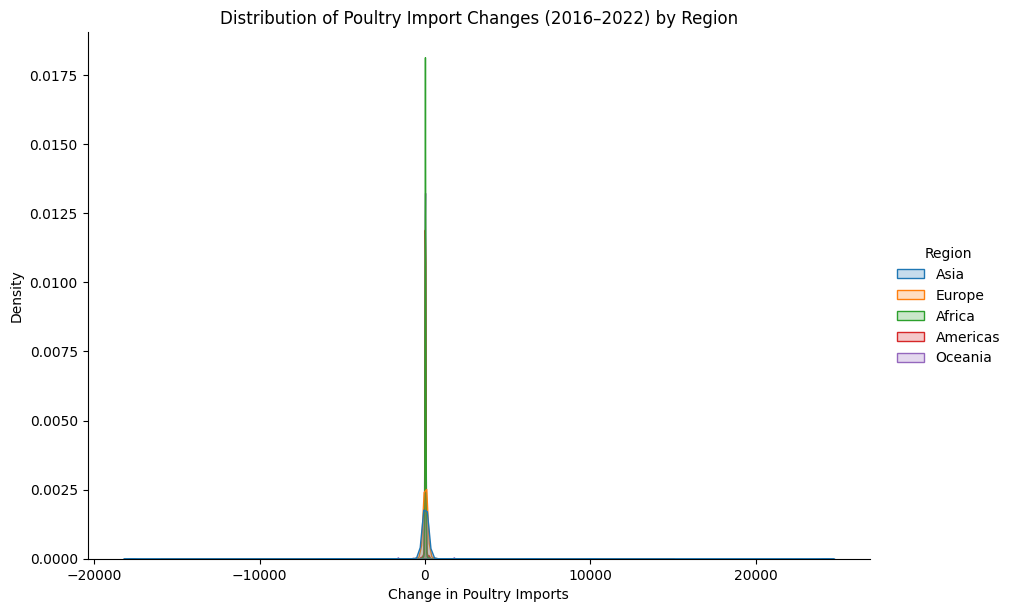

In [ ]:
plot_data = final_data[['Region', 'Poultry_Imports_change']].dropna()

sns.displot(
    data=plot_data,
    x='Poultry_Imports_change',
    hue='Region',
    kind='kde',
    fill=True,
    common_norm=False,
    height=6,
    aspect=1.5
)

plt.title("Distribution of Poultry Import Changes (2016–2022) by Region")
plt.xlabel("Change in Poultry Imports")
plt.ylabel("Density")
plt.show()


In [ ]:
plot_data_clipped = plot_data[plot_data['Poultry_Imports_change'].between(-1000, 1000)]


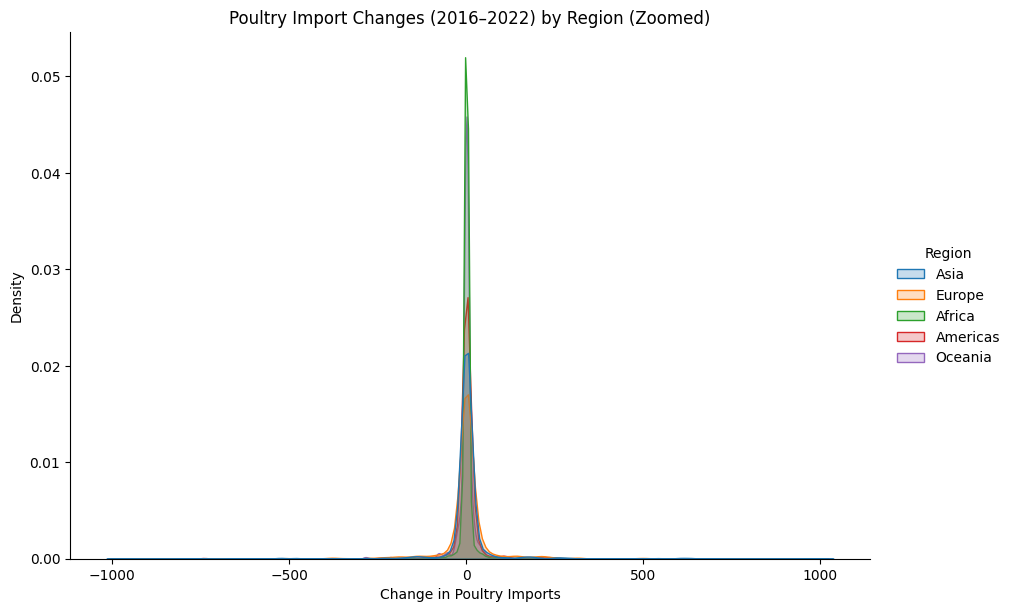

In [ ]:
sns.displot(
    data=plot_data_clipped,
    x='Poultry_Imports_change',
    hue='Region',
    kind='kde',
    fill=True,
    common_norm=False,
    height=6,
    aspect=1.5
)
plt.title("Poultry Import Changes (2016–2022) by Region (Zoomed)")
plt.xlabel("Change in Poultry Imports")
plt.ylabel("Density")
plt.show()


In [ ]:
from scipy.stats import f_oneway

groups = [g['Poultry_Imports_change'].values for _, g in plot_data.groupby('Region')]
anova_result = f_oneway(*groups)
print(f"ANOVA p-value: {anova_result.pvalue:.4f}")


ANOVA p-value: 0.0023


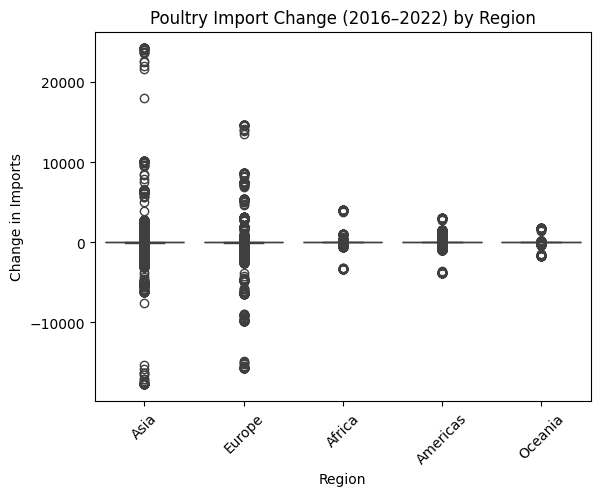

In [ ]:
sns.boxplot(data=plot_data, x='Region', y='Poultry_Imports_change')
plt.title("Poultry Import Change (2016–2022) by Region")
plt.ylabel("Change in Imports")
plt.xticks(rotation=45)
plt.show()


Regions like Asia and Europe have greater diversity in import changes.

Africa, the Americas, and Oceania show more stable or consistent patterns.

The ANOVA p-value of 0.0023 supports that regional differences are statistically significant.

**ENTER CONCLUSION HERE**

### Is there a statistical difference in the change in poultry imports across the regions?

In [ ]:
# Ensure no missing values
plot_data = final_data[['Region', 'Poultry_Imports_change']].dropna()

# Group values by Region
groups = [group['Poultry_Imports_change'].values for _, group in plot_data.groupby('Region')]

# Run one-way ANOVA
anova_result = f_oneway(*groups)

# Print result
print(f"ANOVA p-value: {anova_result.pvalue:.4f}")


ANOVA p-value: 0.0023


**ENTER CONCLUSION HERE**

### Is there a statistical difference in the population growth across the regions?

In [ ]:
# Ensure 'Region' and '2022' columns are present and no missing values
pop_anova_data = final_data[['Region', '2022']].dropna()

# Rename for clarity (optional)
pop_anova_data = pop_anova_data.rename(columns={'2022': 'Pop_Growth_2022'})

# Group population growth by region
pop_groups = [group['Pop_Growth_2022'].values for _, group in pop_anova_data.groupby('Region')]

# Run ANOVA
pop_anova_result = f_oneway(*pop_groups)

# Print result
print(f"ANOVA p-value for population growth across regions: {pop_anova_result.pvalue:.4f}")


ANOVA p-value for population growth across regions: 0.0000


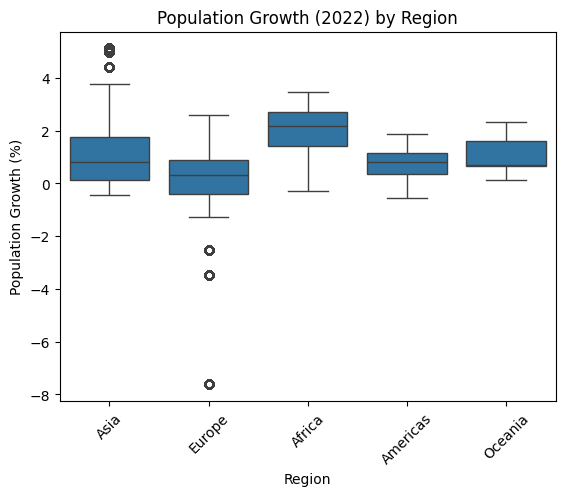

In [ ]:
sns.boxplot(data=pop_anova_data, x='Region', y='Pop_Growth_2022')
plt.title("Population Growth (2022) by Region")
plt.ylabel("Population Growth (%)")
plt.xticks(rotation=45)
plt.show()


The ANOVA result (p = 0.0000) is supported by this visual.

Africa is clearly distinct in its consistently high growth.

Europe is the only region with frequent negative or stagnant growth.

**ENTER CONCLUSION HERE**

### Is there a statistical difference in the gdp per capita growth across the regions?

In [ ]:
gdp_data = final_data[['Region', '2022']].dropna()
gdp_data = gdp_data.rename(columns={'2022': 'GDP_Growth_2022'})

# Step 2: Group by Region
gdp_groups = [group['GDP_Growth_2022'].values for _, group in gdp_data.groupby('Region')]

# Step 3: Run ANOVA
gdp_anova = f_oneway(*gdp_groups)

# Step 4: Display result
print(f"ANOVA p-value for GDP per capita growth across regions: {gdp_anova.pvalue:.4f}")


ANOVA p-value for GDP per capita growth across regions: 0.0000


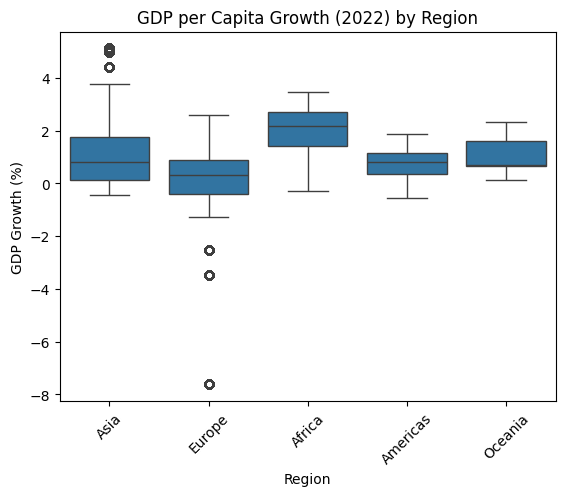

In [ ]:
sns.boxplot(data=gdp_data, x='Region', y='GDP_Growth_2022')
plt.title("GDP per Capita Growth (2022) by Region")
plt.xticks(rotation=45)
plt.ylabel("GDP Growth (%)")
plt.show()


**ENTER CONCLUSION HERE**

## Summary

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Summarise your findings here.  To what extend does the data support the marketing team's intended analysis?
    </font></div>

**ENTER CONCLUSION HERE**

Africa stands out for its high population growth and increasing poultry imports, making it a strategic priority.

Asia shows economic growth and market diversity, offering opportunities in specific countries.

Regions like Europe may require less focus due to stagnant or declining imports and population.

## Sampling

In order to illustrate to the marketing team some of the characteristics of the countries, you should extract a sample of countries.  

Note that the purpose of this sample is to illustrate, not to do further analysis.  So don’t worry about using a small sample size on this case!

These functions can help you:


- [pandas.DataFrame.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

- [pandas.DataFrame.sample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)



<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Describe the sampling approach used here and explain why you used this approach.
    </font></div>

**ENTER APPROACH HERE**

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Produce your sample here.
    </font></div>

In [ ]:
# Step 1: Merge Region info
final_data = pd.merge(
    final_merged,
    mapping[['COUNTRY NAME', 'Region']],
    left_on='Area_animal',
    right_on='COUNTRY NAME',
    how='left'
)

# Step 2: Merge GDP growth (2022)
final_data = pd.merge(
    final_data,
    gdp_growth[['Country Name', '2022']],
    left_on='Area_animal',
    right_on='Country Name',
    how='left'
)

# Step 3: Merge population growth (2022)
final_data = pd.merge(
    final_data,
    pop_growth[['Country Name', '2022']],
    left_on='Area_animal',
    right_on='Country Name',
    how='left'
)

# Step 4: Rename GDP and Population columns for clarity
final_data = final_data.rename(columns={
    '2022_x': 'GDP_Growth_2022',
    '2022_y': 'Pop_Growth_2022'
})


In [ ]:
# Get 2 samples per region without triggering the warning
sample_summary = (
    final_data.groupby('Region')
    .apply(lambda group: group.sample(n=2, random_state=42)[[
        'Area_animal',
        'Region',
        'Poultry_Imports_change',
        'GDP_Growth_2022',
        'Pop_Growth_2022'
    ]])
    .reset_index(drop=True)
)

# Rename columns
sample_summary.columns = [
    'Country',
    'Region',
    'Poultry_Imports_Change',
    'GDP_Growth_2022',
    'Pop_Growth_2022'
]

print(sample_summary)


                Country    Region  Poultry_Imports_Change  GDP_Growth_2022  \
0              Zimbabwe    Africa                    0.63         4.343667   
1               Tunisia    Africa                   -5.22         2.074256   
2                Guyana  Americas                    0.00        62.111024   
3    Dominican Republic  Americas                   -4.22         3.856885   
4                 China      Asia                 -362.00         2.964157   
5  China, Hong Kong SAR      Asia                  -11.65              NaN   
6                Norway    Europe                  214.25         2.084382   
7            Luxembourg    Europe                    2.81        -0.643838   
8             Australia   Oceania                 -195.20         2.924101   
9              Kiribati   Oceania                   -4.15         2.239287   

   Pop_Growth_2022  
0         1.706209  
1         0.585173  
2         0.751934  
3         0.959630  
4        -0.013100  
5              

<ipython-input-95-764392230b93>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.sample(n=2, random_state=42)[[



* **Zimbabwe**: Slight increase in poultry imports (+0.63), strong GDP growth (4.34%), and solid population growth (1.71%)
* **Tunisia**: Decline in poultry imports (–5.22), moderate GDP growth (2.07%), slower population growth (0.59%)

Both countries show population growth; Zimbabwe may be a stronger marketing candidate due to higher economic growth and stable demand.


